In [56]:
import numpy as np

In [57]:
import warnings

In [58]:
class LogisticRegression():
    
    def __init__(self,lr=0.001,iterations=1000):

        self.lr=lr
        self.iterations=iterations
        self.weights=None
        self.bias=None
        
    # Ignore the specific RuntimeWarning related to overflow in the sigmoid function
    warnings.filterwarnings('ignore', category=RuntimeWarning, message='.*overflow encountered in exp.*') 
    
    def sigmoid(self,linear_prediction):
        return 1/(1+np.exp(-linear_prediction))
                          
    def fit(self,X,Y):

        num_samples,num_features=X.shape
        self.weights=np.zeros(num_features)
        self.bias=0

        for _ in range(self.iterations):
            linear_prediction=np.dot(X,self.weights)+self.bias
            predictions=self.sigmoid(linear_prediction)

            Dweights=(1/num_samples)*np.dot(X.T,(predictions-Y))
            Dbias=(1/num_samples)*np.sum(predictions-Y)

            self.weights=self.weights-Dweights*self.lr
            self.bias=self.bias-Dbias*self.lr

    def predict(self,X):
        linear_pred =np.dot(X,self.weights)+self.bias
        predictions=self.sigmoid(linear_pred)
        preds=[0 if y<=0.5 else 1 for y in predictions]
        return np.array(preds)
        

TESTING


In [59]:
from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt
import pandas as pd

In [60]:
dataset=datasets.load_breast_cancer()
df = pd.DataFrame(data=dataset.data,columns=dataset.feature_names)
df['target']=dataset.target

WE CAN JUST DIRECTLY USE dataset=datasets.load_breast_cancer WITHOUT PANDAS BUT I STILL WANNA USE PANDAS

In [61]:
df


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [62]:
X=df.drop('target' , axis=1)
Y=df['target']

In [63]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2, random_state=1)
X_train.shape

(455, 30)

In [64]:
Y_train.shape

(455,)

In [65]:
log = LogisticRegression(lr=0.1)
log.fit(X_train.values, Y_train.values.flatten())
pred=log.predict(X_test.values)

In [66]:
def accuracy(pred, pred_test):
    return np.sum(pred==pred_test)/len(pred)
print(accuracy(pred,Y_test.values))

0.9210526315789473


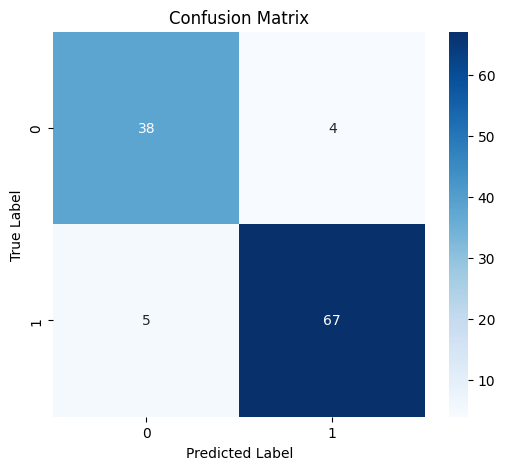

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Generate confusion matrix
cm = confusion_matrix(Y_test, pred)

# Plotting confusion matrix using seaborn heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
